<a href="https://colab.research.google.com/github/Nand0000000000/stockx-data-contest-analisys/blob/main/flgm%26gfsn2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive #importando o drive

In [ ]:
drive.mount('/content/gdrive') #chamando o google drive

Mounted at /content/gdrive


In [ ]:
from google.colab import files #comando para importar arquivos no colab
uploaded = files.upload() #comando para fazer o upload do arquivo

Saving StockX-Data-Contest-2019-3.csv to StockX-Data-Contest-2019-3.csv


In [ ]:
stockx = pd.read_csv('StockX-Data-Contest-2019-3.csv')

<Axes: >

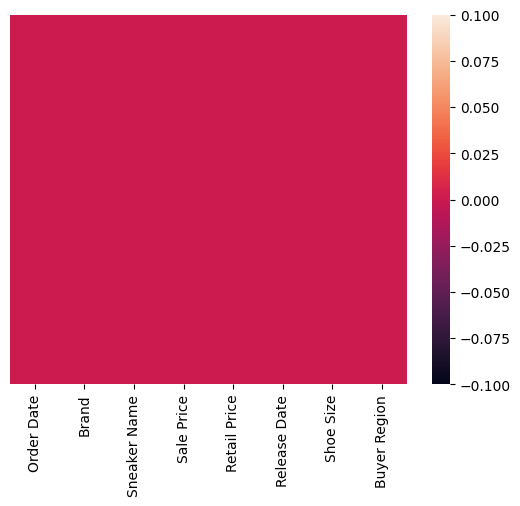

In [ ]:
sns.heatmap(stockx.isnull(), yticklabels = False)

In [ ]:
stockx.head(20)

Order Date   Brand                                   Sneaker Name  \
0      9/1/17   Yeezy           Adidas-Yeezy-Boost-350-Low-V2-Beluga   
1      9/1/17   Yeezy    Adidas-Yeezy-Boost-350-V2-Core-Black-Copper   
2      9/1/17   Yeezy     Adidas-Yeezy-Boost-350-V2-Core-Black-Green   
3      9/1/17   Yeezy       Adidas-Yeezy-Boost-350-V2-Core-Black-Red   
4      9/1/17   Yeezy  Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017   
5      9/1/17   Yeezy  Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017   
6      9/1/17   Yeezy     Adidas-Yeezy-Boost-350-V2-Core-Black-White   
7      9/1/17   Yeezy          Adidas-Yeezy-Boost-350-V2-Cream-White   
8      9/1/17   Yeezy          Adidas-Yeezy-Boost-350-V2-Cream-White   
9      9/1/17   Yeezy          Adidas-Yeezy-Boost-350-V2-Cream-White   
10     9/1/17   Yeezy          Adidas-Yeezy-Boost-350-V2-Cream-White   
11     9/1/17   Yeezy          Adidas-Yeezy-Boost-350-V2-Cream-White   
12     9/1/17   Yeezy          Adidas-Yeezy-Boost-350-V2-Cream-White   
13     9/1/17   Yeezy                Adidas-Yeezy-Boost-350-V2-Zebra   
14     9/1/17   Yeezy                Adidas-Yeezy-Boost-350-V2-Zebra   
15     9/1/17   Yeezy                Adidas-Yeezy-Boost-350-V2-Zebra   
16     9/1/17   Yeezy                Adidas-Yeezy-Boost-350-V2-Zebra   
17     9/1/17   Yeezy                Adidas-Yeezy-Boost-350-V2-Zebra   
18     9/1/17   Yeezy                Adidas-Yeezy-Boost-350-V2-Zebra   
19     9/1/17   Yeezy                Adidas-Yeezy-Boost-350-V2-Zebra   

   Sale Price Retail Price Release Date  Shoe Size    Buyer Region  
0      $1,097         $220      9/24/16       11.0      California  
1        $685         $220     11/23/16       11.0      California  
2        $690         $220     11/23/16       11.0      California  
3      $1,075         $220     11/23/16       11.5        Kentucky  
4        $828         $220      2/11/17       11.0    Rhode Island  
5        $798         $220      2/11/17        8.5        Michigan  
6        $784         $220     12/17/16       11.0      California  
7        $460         $220      4/29/17       10.0        New York  
8        $465         $220      4/29/17       11.0          Kansas  
9        $465         $220      4/29/17       11.0         Florida  
10       $515         $220      4/29/17       11.5      New Jersey  
11       $473         $220      4/29/17       10.0           Texas  
12       $460         $220      4/29/17        9.0         Florida  
13       $570         $220      2/25/17       14.0        Michigan  
14       $525         $220      2/25/17        8.0        New York  
15       $658         $220      2/25/17       11.0      California  
16       $650         $220      2/25/17       11.0  North Carolina  
17       $610         $220      2/25/17       10.0      New Jersey  
18       $589         $220      2/25/17        9.0        New York  
19       $850         $220      2/25/17        5.5        Michigan

In [ ]:
colunas_numericas = stockx.select_dtypes(include=['int64', 'float64'])

In [ ]:
import pandas as pd

# Remova o cifrão e outros caracteres não numéricos e converta para tipo numérico em 'Retail Price'
stockx['Retail Price'] = stockx['Retail Price'].apply(lambda x: ''.join(filter(str.isdigit, str(x))))
stockx['Retail Price'] = pd.to_numeric(stockx['Retail Price'], errors='coerce')

# Remova o cifrão e outros caracteres não numéricos e converta para tipo numérico em 'Sale Price'
stockx['Sale Price'] = stockx['Sale Price'].apply(lambda x: ''.join(filter(str.isdigit, str(x))))
stockx['Sale Price'] = pd.to_numeric(stockx['Sale Price'], errors='coerce')

In [ ]:
stockx[['Sale Price', 'Retail Price']].cov()

Sale Price  Retail Price
Sale Price    65527.280345 -23322.741294
Retail Price -23322.741294  63504.048121

In [ ]:
stockx[['Sale Price', 'Retail Price']].corr(numeric_only = True)

Sale Price  Retail Price
Sale Price       1.00000      -0.36155
Retail Price    -0.36155       1.00000

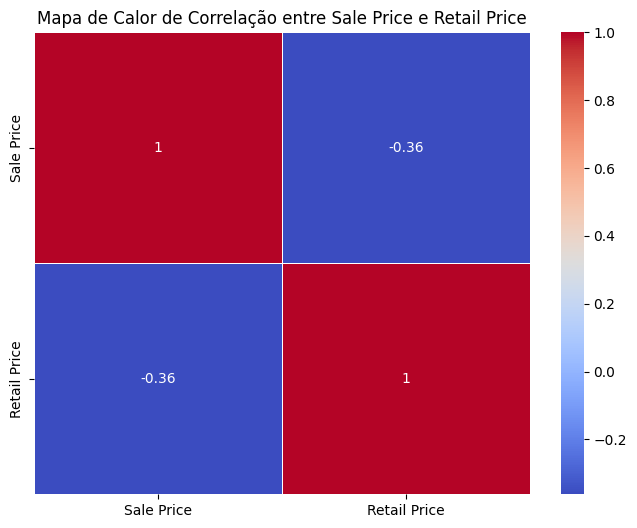

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

subset = stockx[['Sale Price', 'Retail Price']]

# Calcule a matriz de correlação entre as duas colunas
correlation_matrix = subset.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Mapa de Calor de Correlação entre Sale Price e Retail Price')
plt.show()


In [ ]:
stockx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    99956 non-null  object 
 1   Brand         99956 non-null  object 
 2   Sneaker Name  99956 non-null  object 
 3   Sale Price    99956 non-null  object 
 4   Retail Price  99956 non-null  object 
 5   Release Date  99956 non-null  object 
 6   Shoe Size     99956 non-null  float64
 7   Buyer Region  99956 non-null  object 
dtypes: float64(1), object(7)
memory usage: 6.1+ MB


<Axes: >

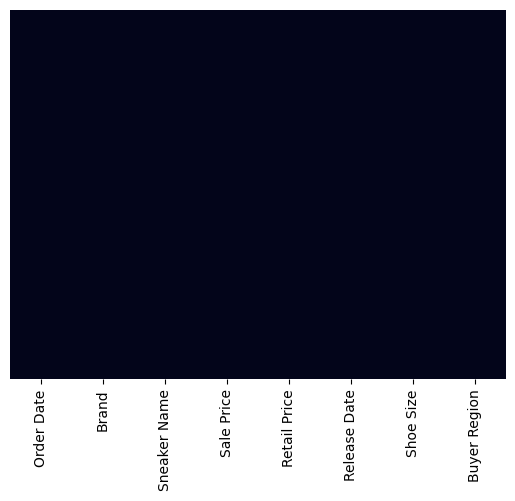

In [ ]:
sns.heatmap(stockx.isnull(), yticklabels = False, cbar=False)

In [ ]:
stockx.columns

Index(['Order Date', 'Brand', 'Sneaker Name', 'Sale Price', 'Retail Price',
       'Release Date', 'Shoe Size', 'Buyer Region'],
      dtype='object')

In [ ]:
stockx = pd.get_dummies(stockx, columns=['Order Date', 'Brand', 'Sneaker Name', 'Sale Price', 'Retail Price',
       'Release Date', 'Shoe Size', 'Buyer Region'])

In [ ]:
brand = pd.get_dummies(stockx['Brand'], drop_first=True)
brand

Off-White
0              0
1              0
2              0
3              0
4              0
...          ...
99951          0
99952          0
99953          0
99954          0
99955          0

[99956 rows x 1 columns]

In [ ]:
Rdate = pd.get_dummies(stockx['Release Date'], drop_first=True)
Rdate

10/18/18  10/3/18  11/1/17  11/14/15  11/18/17  11/23/16  11/23/18  \
0             0        0        0         0         0         0         0   
1             0        0        0         0         0         1         0   
2             0        0        0         0         0         1         0   
3             0        0        0         0         0         1         0   
4             0        0        0         0         0         0         0   
...         ...      ...      ...       ...       ...       ...       ...   
99951         0        0        0         0         0         0         0   
99952         0        0        0         0         0         0         0   
99953         0        0        0         0         0         0         0   
99954         0        0        0         0         0         0         0   
99955         0        0        0         0         0         0         0   

       11/25/17  11/28/18  11/4/17  ...  6/14/18  6/23/18  6/27/15  6/30/18  \
0             0         0        0  ...        0        0        0        0   
1             0         0        0  ...        0        0        0        0   
2             0         0        0  ...        0        0        0        0   
3             0         0        0  ...        0        0        0        0   
4             0         0        0  ...        0        0        0        0   
...         ...       ...      ...  ...      ...      ...      ...      ...   
99951         0         0        0  ...        0        0        0        0   
99952         0         0        0  ...        0        0        0        0   
99953         0         0        0  ...        0        0        0        0   
99954         0         0        0  ...        0        0        0        0   
99955         0         0        0  ...        0        0        0        0   

       7/27/18  8/22/15  8/25/18  8/3/18  9/24/16  9/9/17  
0            0        0        0       0        1       0  
1            0        0        0       0        0       0  
2            0        0        0       0        0       0  
3            0        0        0       0        0       0  
4            0        0        0       0        0       0  
...        ...      ...      ...     ...      ...     ...  
99951        0        0        0       0        0       0  
99952        0        0        0       0        0       0  
99953        0        0        0       0        0       0  
99954        0        0        0       0        0       0  
99955        0        0        0       0        0       0  

[99956 rows x 34 columns]

In [ ]:
Sname = pd.get_dummies(stockx['Sneaker Name'], drop_first=True)
Sname

Adidas-Yeezy-Boost-350-Low-Oxford-Tan  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   
...                                      ...   
99951                                      0   
99952                                      0   
99953                                      0   
99954                                      0   
99955                                      0   

       Adidas-Yeezy-Boost-350-Low-Pirate-Black-2015  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   
...                                             ...   
99951                                             0   
99952                                             0   
99953                                             0   
99954                                             0   
99955                                             0   

       Adidas-Yeezy-Boost-350-Low-Pirate-Black-2016  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   
...                                             ...   
99951                                             0   
99952                                             0   
99953                                             0   
99954                                             0   
99955                                             0   

       Adidas-Yeezy-Boost-350-Low-Turtledove  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   
...                                      ...   
99951                                      0   
99952                                      0   
99953                                      0   
99954                                      0   
99955                                      0   

       Adidas-Yeezy-Boost-350-Low-V2-Beluga  \
0                                         1   
1                                         0   
2                                         0   
3                                         0   
4                                         0   
...                                     ...   
99951                                     0   
99952                                     0   
99953                                     0   
99954                                     0   
99955                                     0   

       Adidas-Yeezy-Boost-350-V2-Beluga-2pt0  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   
...                                      ...   
99951                                      0   
99952                                      0   
99953                                      0   
99954                                      0   
99955                                      0   

       Adidas-Yeezy-Boost-350-V2-Blue-Tint  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   
...                                    ...   
99951                                    0   
99952                

In [ ]:
regiao = pd.get_dummies(stockx['Order Date'], drop_first=True)
regiao

1/1/19  1/10/18  1/10/19  1/11/18  1/11/19  1/12/18  1/12/19  1/13/18  \
0           0        0        0        0        0        0        0        0   
1           0        0        0        0        0        0        0        0   
2           0        0        0        0        0        0        0        0   
3           0        0        0        0        0        0        0        0   
4           0        0        0        0        0        0        0        0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
99951       0        0        0        0        0        0        0        0   
99952       0        0        0        0        0        0        0        0   
99953       0        0        0        0        0        0        0        0   
99954       0        0        0        0        0        0        0        0   
99955       0        0        0        0        0        0        0        0   

       1/13/19  1/14/18  ...  9/5/17  9/5/18  9/6/17  9/6/18  9/7/17  9/7/18  \
0            0        0  ...       0       0       0       0       0       0   
1            0        0  ...       0       0       0       0       0       0   
2            0        0  ...       0       0       0       0       0       0   
3            0        0  ...       0       0       0       0       0       0   
4            0        0  ...       0       0       0       0       0       0   
...        ...      ...  ...     ...     ...     ...     ...     ...     ...   
99951        0        0  ...       0       0       0       0       0       0   
99952        0        0  ...       0       0       0       0       0       0   
99953        0        0  ...       0       0       0       0       0       0   
99954        0        0  ...       0       0       0       0       0       0   
99955        0        0  ...       0       0       0       0       0       0   

       9/8/17  9/8/18  9/9/17  9/9/18  
0           0       0       0       0  
1           0       0       0       0  
2           0       0       0       0  
3           0       0       0       0  
4           0       0       0       0  
...       ...     ...     ...     ...  
99951       0       0       0       0  
99952       0       0       0       0  
99953       0       0       0       0  
99954       0       0       0       0  
99955       0       0       0       0  

[99956 rows x 530 columns]

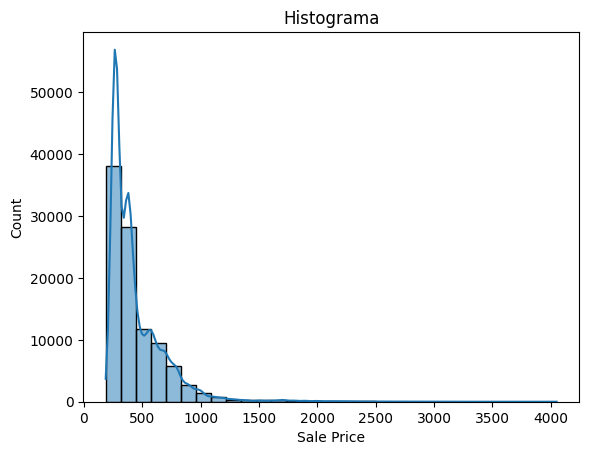

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(stockx['Sale Price'], bins=30, kde=True)
plt.title('Histograma')
plt.show()

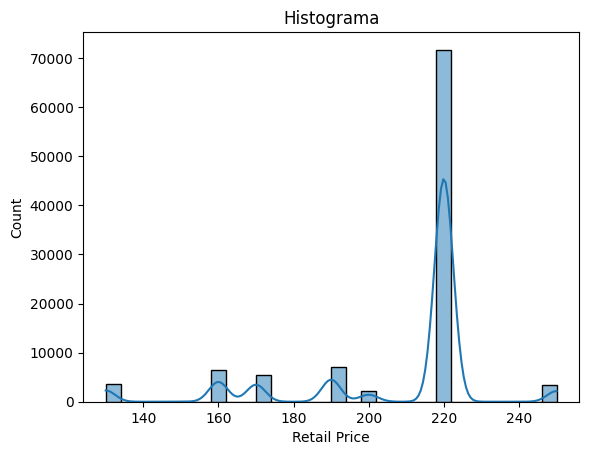

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(stockx['Retail Price'], bins=30, kde=True)
plt.title('Histograma')
plt.show()

In [ ]:
import plotly.express as px
fig = px.histogram(stockx, x='Sale Price', marginal = 'rug')
fig.show()

In [ ]:
import pandas as pd

stockx['Order Date'] = pd.to_datetime(stockx['Order Date'])
stockx['Release Date'] = pd.to_datetime(stockx['Release Date'])
stockx['meses'] = stockx['Order Date'].dt.month
stockx['mesesLancamento'] = stockx['Release Date'].dt.month
# 'meses' agora conterá o número correspondente ao mês de cada data

stockx['Order Date'] = pd.to_numeric(pd.to_datetime(stockx['Order Date']))
stockx['Release Date'] = pd.to_numeric(pd.to_datetime(stockx['Release Date']))

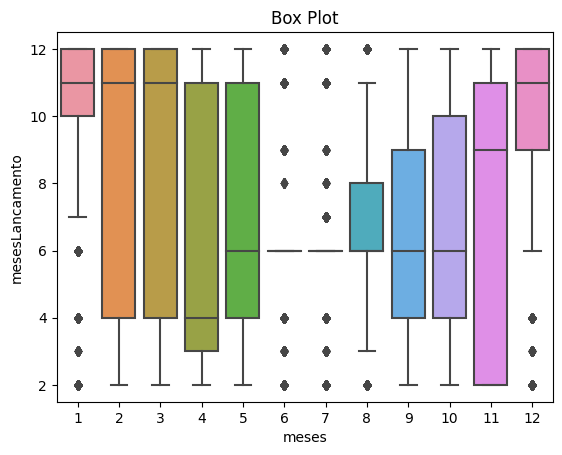

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='meses', y='mesesLancamento', data=stockx)
plt.title('Box Plot')
plt.show()


In [ ]:
fig2 = px.box(stockx, x='Retail Price', y='Sale Price') #cria o box plot e personaliza os eixos coordenados
fig2.show()

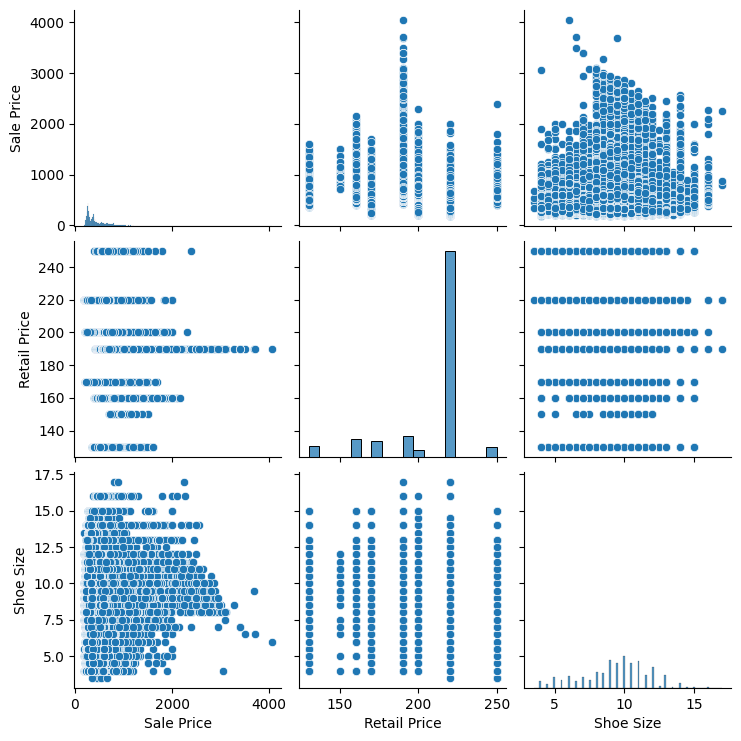

In [ ]:
import seaborn as sns
col = []
sns.pairplot(colunas_numericas)

In [ ]:
#importar as libs para trabalhar com números aleatórios
from numpy.random import seed #inicializar o gerador de números aleatórios
from numpy.random import randint #retorna um número inteiro aleatório
from numpy import mean

seed(1)

rols = randint(1,7,50)
print(rols)
print(mean(rols))

[6 4 5 1 2 4 6 1 1 2 5 6 5 2 3 5 6 3 5 4 5 3 5 6 3 5 2 2 1 6 2 2 6 2 2 1 5
 2 1 1 6 4 3 2 1 4 6 2 2 4]
3.44


In [ ]:
from sklearn.preprocessing import StandardScaler #sklearn.preprocessing fornece várias funções de utilidade comuns e classes de transformadores para alterar vetores de recursos brutos em uma representação mais adequada

scaler = StandardScaler() #o módulo standard.scaler padroniza os dados
ajuste = scaler.fit(stockx) #determina a média e o desvio padrão
normal = scaler.transform(stockx) #aplicar a normal padrão z=(valor - média)/desvio padrão

normalpadrao = pd.DataFrame(normal)
normalpadrao.head()

0         1         2         3         4         5         6     \
0 -0.037182 -0.057553 -0.034958 -0.063862 -0.036501 -0.064256 -0.034669   
1 -0.037182 -0.057553 -0.034958 -0.063862 -0.036501 -0.064256 -0.034669   
2 -0.037182 -0.057553 -0.034958 -0.063862 -0.036501 -0.064256 -0.034669   
3 -0.037182 -0.057553 -0.034958 -0.063862 -0.036501 -0.064256 -0.034669   
4 -0.037182 -0.057553 -0.034958 -0.063862 -0.036501 -0.064256 -0.034669   

       7         8         9     ...      2182      2183      2184      2185  \
0 -0.058336 -0.033192 -0.053567  ... -0.023464 -0.085832 -0.249915 -0.067248   
1 -0.058336 -0.033192 -0.053567  ... -0.023464 -0.085832 -0.249915 -0.067248   
2 -0.058336 -0.033192 -0.053567  ... -0.023464 -0.085832 -0.249915 -0.067248   
3 -0.058336 -0.033192 -0.053567  ... -0.023464 -0.085832 -0.249915 -0.067248   
4 -0.058336 -0.033192 -0.053567  ... -0.023464 -0.085832 -0.249915 -0.067248   

       2186      2187      2188      2189      2190      2191  
0 -0.029001 -0.144989 -0.137812 -0.040786 -0.092059 -0.020008  
1 -0.029001 -0.144989 -0.137812 -0.040786 -0.092059 -0.020008  
2 -0.029001 -0.144989 -0.137812 -0.040786 -0.092059 -0.020008  
3 -0.029001 -0.144989 -0.137812 -0.040786 -0.092059 -0.020008  
4 -0.029001 -0.144989 -0.137812 -0.040786 -0.092059 -0.020008  

[5 rows x 2192 columns]

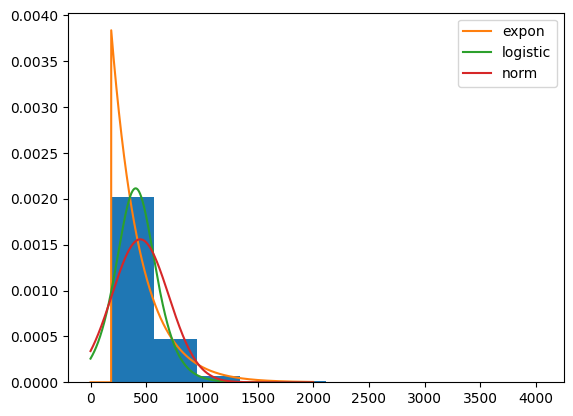

In [ ]:
import scipy #bibloteca para resolução de problemas de matemática e engenharia
import scipy.stats #módulo com grande variadade de funções
size=2000 #tamanho da escala dos eixos coordenados
x = np.arange(size) #a função arange retorna uma matriz de valores igualmente espaçados dentro do intervalo especificado
y = stockx['Sale Price'].values
h = plt.hist(y, density=True) #chamando a função histograma, o histograma aqui é unidimensional em y e density = True normaliza os dados

dist_names = ['expon', 'logistic', 'norm']
for dist_name in dist_names:  #o comando for _ in cria um laço
  dist = getattr(scipy.stats, dist_name) #a função getattr retorna o valor de um atributo de um objeto
  params = dist.fit(y)
  arg = params[:-2] #cria uma nova lista mostrando os primeiros elementos excluindo os 2 últimos elementos
  loc = params[-2] #localiza o penúltimo elemento
  scale = params[-1] #localiza o último elemento
  if arg:
    pdf_fitted = dist.pdf(x, *arg, loc=loc, scale=scale) #*arg permite que a função aceite números variáveis de argumentos posicionais; loc = loc é a mesma coisa de loc = loc + loc
  else:
    pdf_fitted = dist.pdf(x, loc=loc, scale=scale)
  plt.plot(pdf_fitted, label=dist_name)

plt.legend(loc= 'upper right')

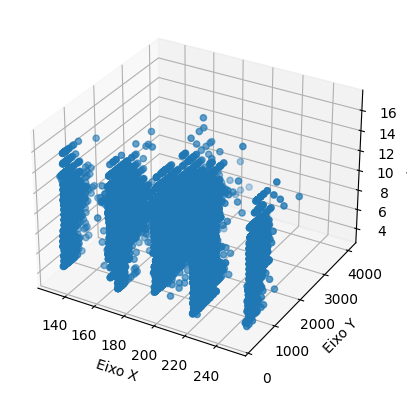

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = stockx['Retail Price']
y = stockx['Sale Price']
z = stockx['Shoe Size']

ax.scatter(x, y, z)

ax.set_xlabel('Eixo X')
ax.set_ylabel('Eixo Y')
ax.set_zlabel('Eixo Z')

plt.show()


In [ ]:
import pandas as pd
stockx['Sale Price'] = pd.to_numeric(stockx['Sale Price'], errors='coerce')

   Order Date  Brand Sneaker Name  Sale Price
0      9/1/17  Yeezy     Sneaker1    0.000000
1      9/1/17  Yeezy     Sneaker2    0.566764
2      9/1/17  Yeezy     Sneaker3    0.143563
3      9/1/17  Yeezy     Sneaker4    0.539599
4      9/1/17  Yeezy     Sneaker5    0.487189
..        ...    ...          ...         ...
95     9/1/17  Yeezy    Sneaker96    0.394761
96     9/1/17  Yeezy    Sneaker97    0.394761
97     9/1/17  Yeezy    Sneaker98    0.394761
98     9/1/17  Yeezy    Sneaker99    0.394761
99     9/1/17  Yeezy   Sneaker100    0.394761

[100 rows x 4 columns]


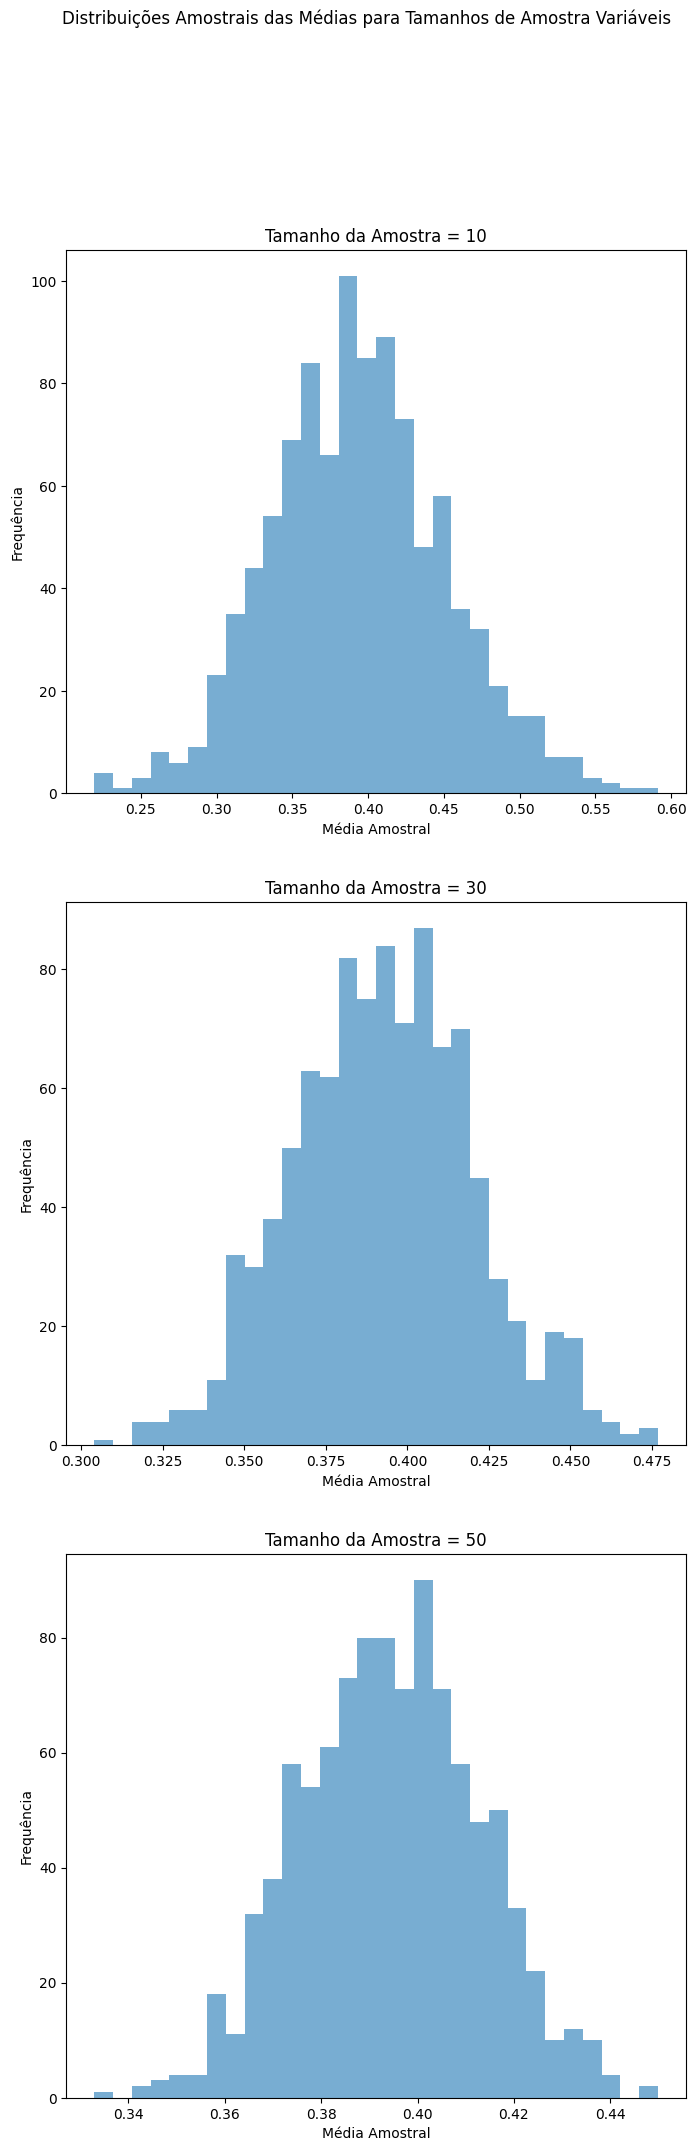

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

data = {
    'Order Date': ['9/1/17'] * 100,
    'Brand': ['Yeezy'] * 100,
    'Sneaker Name': ['Sneaker' + str(i) for i in range(1, 101)],
    'Sale Price': np.concatenate([np.random.normal(250, 50, 80), [np.nan] * 20]),  # Distribuição fictícia de Sale Price com 20 NaNs
}

df = pd.DataFrame(data)

# Preencher valores NaN em 'Sale Price' com a média da coluna
df['Sale Price'].fillna(df['Sale Price'].mean(), inplace=True)

# Escolha da coluna para a normalização
coluna_norm = 'Sale Price'

# Criar um MinMaxScaler
scaler = MinMaxScaler()

# Aplicar a normalização apenas na coluna desejada
df[coluna_norm] = scaler.fit_transform(df[[coluna_norm]])

# Visualizar o DataFrame com os valores normalizados
print(df)

# Variar o tamanho das amostras
tamanhos_amostra = [10, 30, 50]

# Número de repetições para criar as distribuições amostrais
num_repeticoes = 1000

# Dicionário para armazenar as distribuições amostrais das médias
distribuicoes_amostrais = {}

# Loop para criar as distribuições amostrais
for tamanho_amostra in tamanhos_amostra:
    medias_amostrais = []
    for _ in range(num_repeticoes):
        amostra = np.random.choice(df[coluna_norm], size=tamanho_amostra, replace=False)
        media_amostral = np.mean(amostra)
        medias_amostrais.append(media_amostral)
    distribuicoes_amostrais[f'Amostra de {tamanho_amostra}'] = medias_amostrais

# Visualize as distribuições amostrais das médias
fig, axs = plt.subplots(len(tamanhos_amostra), 1, figsize=(8, 8 * len(tamanhos_amostra)))
fig.suptitle('Distribuições Amostrais das Médias para Tamanhos de Amostra Variáveis')

for i, tamanho_amostra in enumerate(tamanhos_amostra):
    axs[i].hist(distribuicoes_amostrais[f'Amostra de {tamanho_amostra}'], bins=30, alpha=0.6)
    axs[i].set_title(f'Tamanho da Amostra = {tamanho_amostra}')
    axs[i].set_xlabel('Média Amostral')
    axs[i].set_ylabel('Frequência')

plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

colunas_norm = ['Sale Price', 'Retail Price', 'Shoe Size']

# Remover caracteres não numéricos e converter para float
for coluna in colunas_norm:
    stockx[coluna] = pd.to_numeric(stockx[coluna].replace('[\$,]', '', regex=True), errors='coerce')

scaler = MinMaxScaler()

# Aplicando a normalização apenas nas colunas desejadas
stockx[colunas_norm] = scaler.fit_transform(stockx[colunas_norm])

# Exibindo o DataFrame com os valores normalizados
print(stockx)


      Order Date   Brand                                   Sneaker Name  \
0         9/1/17   Yeezy           Adidas-Yeezy-Boost-350-Low-V2-Beluga   
1         9/1/17   Yeezy    Adidas-Yeezy-Boost-350-V2-Core-Black-Copper   
2         9/1/17   Yeezy     Adidas-Yeezy-Boost-350-V2-Core-Black-Green   
3         9/1/17   Yeezy       Adidas-Yeezy-Boost-350-V2-Core-Black-Red   
4         9/1/17   Yeezy  Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017   
...          ...     ...                                            ...   
99951    2/13/19   Yeezy    adidas-Yeezy-Boost-350-V2-Static-Reflective   
99952    2/13/19   Yeezy    adidas-Yeezy-Boost-350-V2-Static-Reflective   
99953    2/13/19   Yeezy    adidas-Yeezy-Boost-350-V2-Static-Reflective   
99954    2/13/19   Yeezy    adidas-Yeezy-Boost-350-V2-Static-Reflective   
99955    2/13/19   Yeezy    adidas-Yeezy-Boost-350-V2-Static-Reflective   

       Sale Price  Retail Price Release Date  Shoe Size  Buyer Region  
0             NaN          

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:473: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:474: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


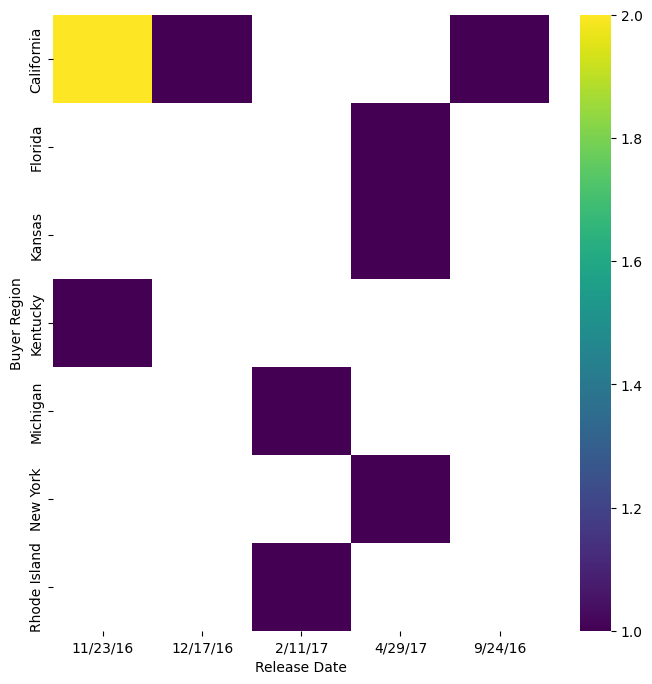

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Buyer Region'].value_counts()
    for x_label, grp in _df_10.groupby('Release Date')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Release Date')
_ = plt.ylabel('Buyer Region')

      Order Date   Brand                                   Sneaker Name  \
0         9/1/17   Yeezy           Adidas-Yeezy-Boost-350-Low-V2-Beluga   
1         9/1/17   Yeezy    Adidas-Yeezy-Boost-350-V2-Core-Black-Copper   
2         9/1/17   Yeezy     Adidas-Yeezy-Boost-350-V2-Core-Black-Green   
3         9/1/17   Yeezy       Adidas-Yeezy-Boost-350-V2-Core-Black-Red   
4         9/1/17   Yeezy  Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017   
...          ...     ...                                            ...   
99951    2/13/19   Yeezy    adidas-Yeezy-Boost-350-V2-Static-Reflective   
99952    2/13/19   Yeezy    adidas-Yeezy-Boost-350-V2-Static-Reflective   
99953    2/13/19   Yeezy    adidas-Yeezy-Boost-350-V2-Static-Reflective   
99954    2/13/19   Yeezy    adidas-Yeezy-Boost-350-V2-Static-Reflective   
99955    2/13/19   Yeezy    adidas-Yeezy-Boost-350-V2-Static-Reflective   

       Sale Price  Retail Price Release Date  Shoe Size  Buyer Region  
0        0.235766          

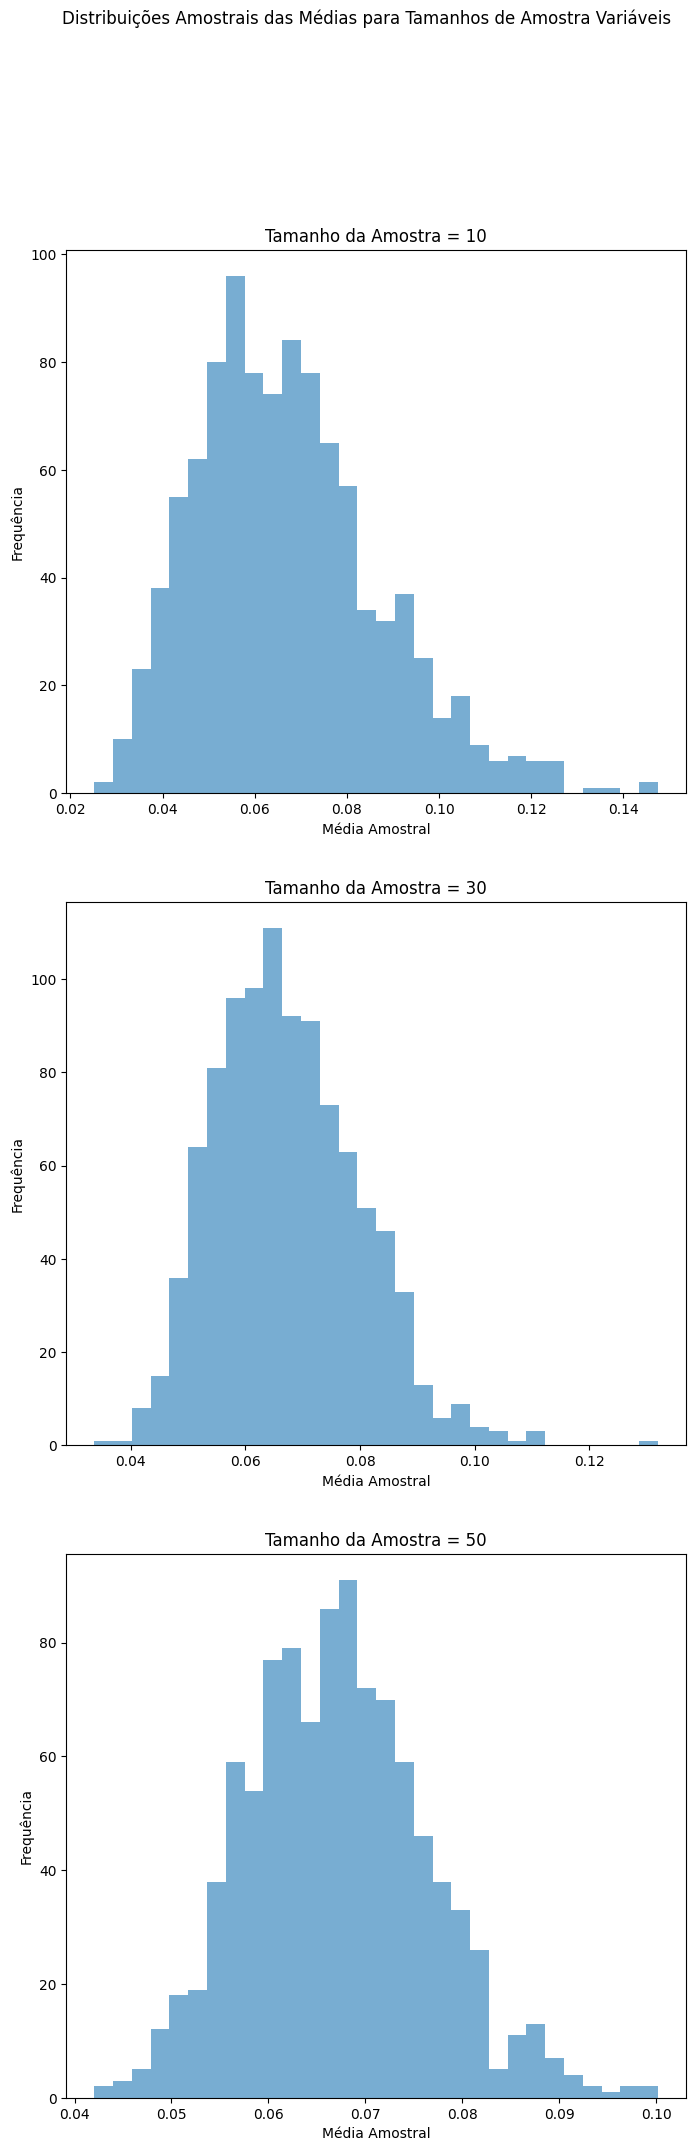

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

df2 = pd.DataFrame(stockx)

# Preencher valores NaN em 'Sale Price' com a média da coluna
df2['Sale Price'].fillna(df2['Sale Price'].mean(), inplace=True)

# Escolha da coluna para a normalização
coluna_norm = 'Sale Price'

# Criar um MinMaxScaler
scaler = MinMaxScaler()

# Aplicar a normalização apenas na coluna desejada
df2[coluna_norm] = scaler.fit_transform(df2[[coluna_norm]])

# Visualizar o DataFrame com os valores normalizados
print(df2)

# Variar o tamanho das amostras
tamanhos_amostra = [10, 30, 50]

# Número de repetições para criar as distribuições amostrais
num_repeticoes = 1000

# Dicionário para armazenar as distribuições amostrais das médias
distribuicoes_amostrais = {}

# Loop para criar as distribuições amostrais
for tamanho_amostra in tamanhos_amostra:
    medias_amostrais = []
    for _ in range(num_repeticoes):
        amostra = np.random.choice(df2[coluna_norm], size=tamanho_amostra, replace=False)
        media_amostral = np.mean(amostra)
        medias_amostrais.append(media_amostral)
    distribuicoes_amostrais[f'Amostra de {tamanho_amostra}'] = medias_amostrais

# Visualize as distribuições amostrais das médias
fig, axs = plt.subplots(len(tamanhos_amostra), 1, figsize=(8, 8 * len(tamanhos_amostra)))
fig.suptitle('Distribuições Amostrais das Médias para Tamanhos de Amostra Variáveis')

for i, tamanho_amostra in enumerate(tamanhos_amostra):
    axs[i].hist(distribuicoes_amostrais[f'Amostra de {tamanho_amostra}'], bins=30, alpha=0.6)
    axs[i].set_title(f'Tamanho da Amostra = {tamanho_amostra}')
    axs[i].set_xlabel('Média Amostral')
    axs[i].set_ylabel('Frequência')

plt.show()


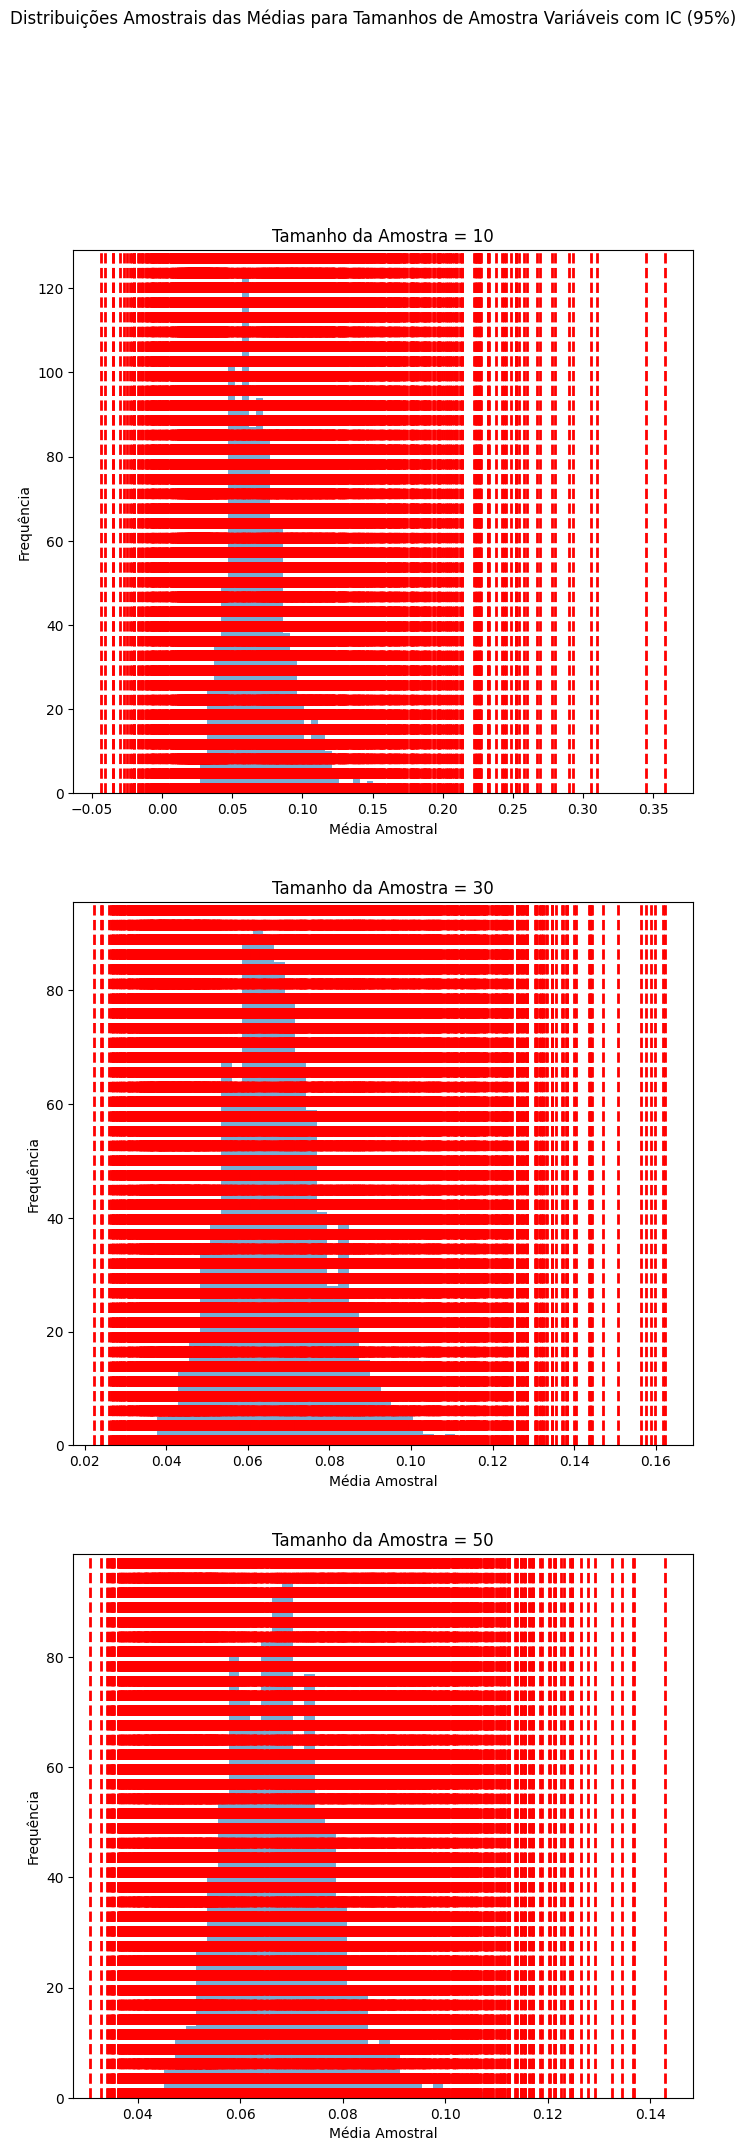

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem, t

df = pd.DataFrame(stockx)

# Preencher valores NaN em 'Sale Price' com a média da coluna
df['Sale Price'].fillna(df['Sale Price'].mean(), inplace=True)

# Escolha da coluna para a normalização
coluna_norm = 'Sale Price'

# Criar um MinMaxScaler
scaler = MinMaxScaler()

# Aplicar a normalização apenas na coluna desejada
df[coluna_norm] = scaler.fit_transform(df[[coluna_norm]])

# Variar o tamanho das amostras
tamanhos_amostra = [10, 30, 50]

# Número de repetições para criar as distribuições amostrais
num_repeticoes = 1000

# Dicionário para armazenar as distribuições amostrais das médias e ICs
distribuicoes_amostrais = {}

# Loop para criar as distribuições amostrais
for tamanho_amostra in tamanhos_amostra:
    medias_amostrais = []
    ics_amostrais = []
    for _ in range(num_repeticoes):
        amostra = np.random.choice(df[coluna_norm], size=tamanho_amostra, replace=False)
        media_amostral = np.mean(amostra)
        medias_amostrais.append(media_amostral)

        # Calcula o intervalo de confiança (95% de confiança)
        ic = t.interval(0.95, len(amostra) - 1, loc=np.mean(amostra), scale=sem(amostra))
        ics_amostrais.append(ic)

    distribuicoes_amostrais[f'Amostra de {tamanho_amostra}'] = {'medias': medias_amostrais, 'ics': ics_amostrais}

# Visualize as distribuições amostrais das médias com intervalos de confiança
fig, axs = plt.subplots(len(tamanhos_amostra), 1, figsize=(8, 8 * len(tamanhos_amostra)))
fig.suptitle('Distribuições Amostrais das Médias para Tamanhos de Amostra Variáveis com IC (95%)')

for i, tamanho_amostra in enumerate(tamanhos_amostra):
    axs[i].hist(distribuicoes_amostrais[f'Amostra de {tamanho_amostra}']['medias'], bins=30, alpha=0.6)
    axs[i].set_title(f'Tamanho da Amostra = {tamanho_amostra}')
    axs[i].set_xlabel('Média Amostral')
    axs[i].set_ylabel('Frequência')

    # Adiciona linhas verticais para os intervalos de confiança
    for ic in distribuicoes_amostrais[f'Amostra de {tamanho_amostra}']['ics']:
        axs[i].axvline(ic[0], color='red', linestyle='dashed', linewidth=2)
        axs[i].axvline(ic[1], color='red', linestyle='dashed', linewidth=2)

plt.show()


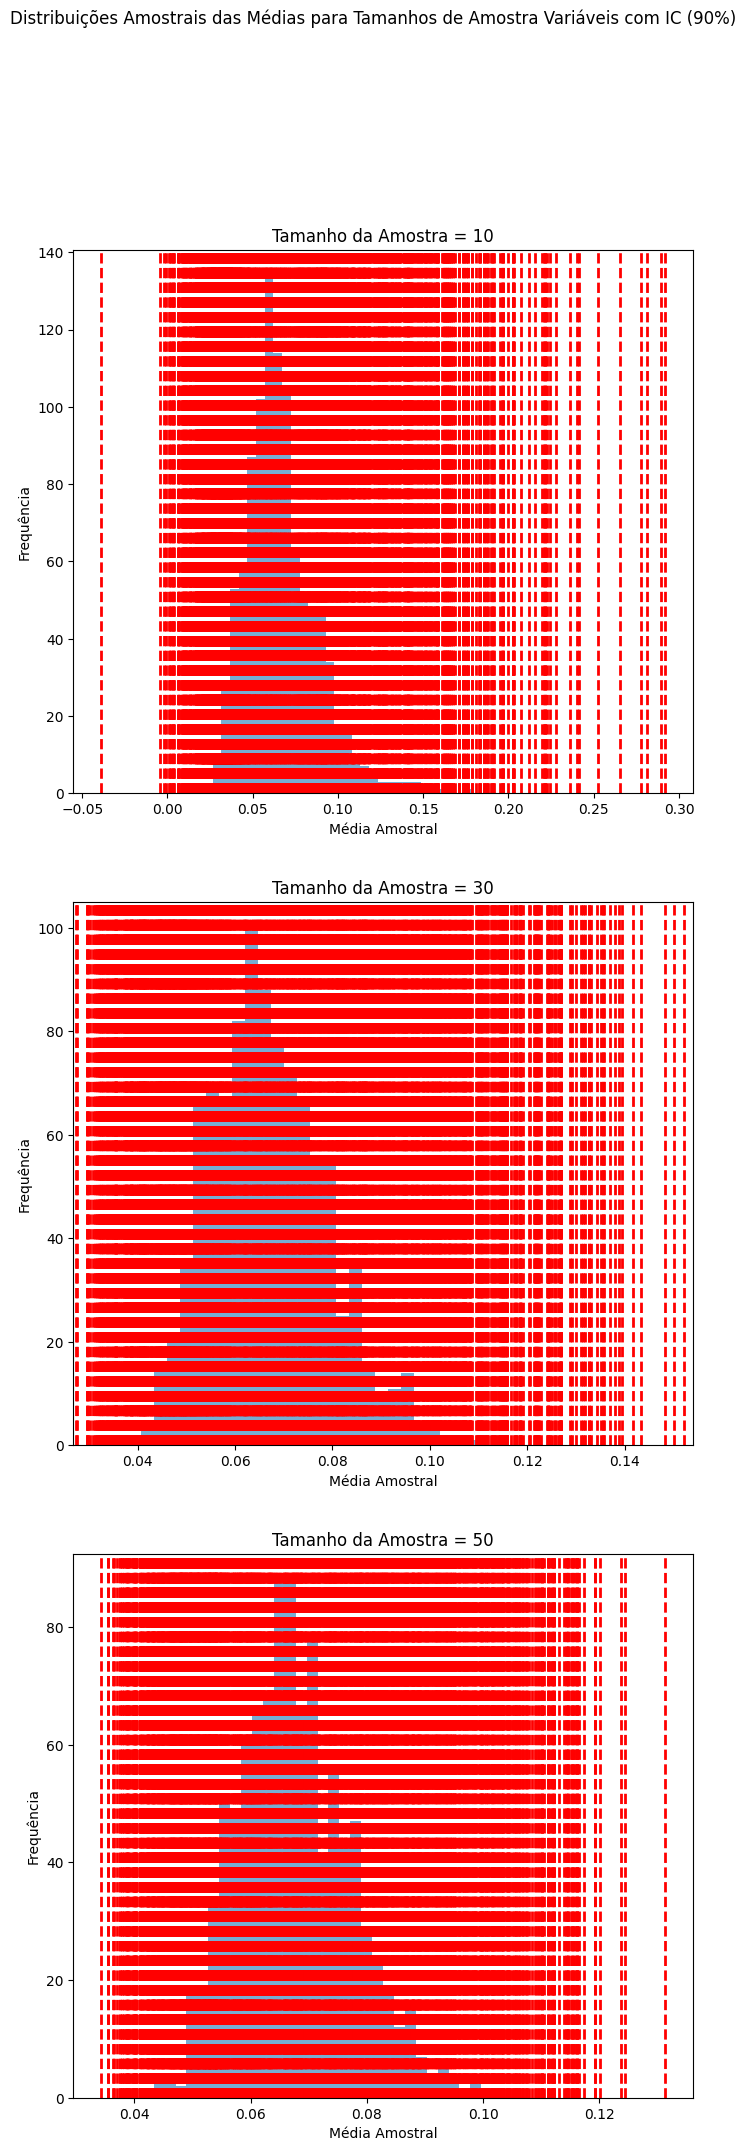

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem, t

df = pd.DataFrame(stockx)

# Preencher valores NaN em 'Sale Price' com a média da coluna
df['Sale Price'].fillna(df['Sale Price'].mean(), inplace=True)

# Escolha da coluna para a normalização
coluna_norm = 'Sale Price'

# Criar um MinMaxScaler
scaler = MinMaxScaler()

# Aplicar a normalização apenas na coluna desejada
df[coluna_norm] = scaler.fit_transform(df[[coluna_norm]])

# Variar o tamanho das amostras
tamanhos_amostra = [10, 30, 50]

# Número de repetições para criar as distribuições amostrais
num_repeticoes = 1000

# Dicionário para armazenar as distribuições amostrais das médias e ICs
distribuicoes_amostrais = {}

# Loop para criar as distribuições amostrais
for tamanho_amostra in tamanhos_amostra:
    medias_amostrais = []
    ics_amostrais = []
    for _ in range(num_repeticoes):
        amostra = np.random.choice(df[coluna_norm], size=tamanho_amostra, replace=False)
        media_amostral = np.mean(amostra)
        medias_amostrais.append(media_amostral)

        # Calcula o intervalo de confiança (90% de confiança)
        ic = t.interval(0.9, len(amostra) - 1, loc=np.mean(amostra), scale=sem(amostra))
        ics_amostrais.append(ic)

    distribuicoes_amostrais[f'Amostra de {tamanho_amostra}'] = {'medias': medias_amostrais, 'ics': ics_amostrais}

# Visualize as distribuições amostrais das médias com intervalos de confiança
fig, axs = plt.subplots(len(tamanhos_amostra), 1, figsize=(8, 8 * len(tamanhos_amostra)))
fig.suptitle('Distribuições Amostrais das Médias para Tamanhos de Amostra Variáveis com IC (90%)')

for i, tamanho_amostra in enumerate(tamanhos_amostra):
    axs[i].hist(distribuicoes_amostrais[f'Amostra de {tamanho_amostra}']['medias'], bins=30, alpha=0.6)
    axs[i].set_title(f'Tamanho da Amostra = {tamanho_amostra}')
    axs[i].set_xlabel('Média Amostral')
    axs[i].set_ylabel('Frequência')

    # Adiciona linhas verticais para os intervalos de confiança
    for ic in distribuicoes_amostrais[f'Amostra de {tamanho_amostra}']['ics']:
        axs[i].axvline(ic[0], color='red', linestyle='dashed', linewidth=2)
        axs[i].axvline(ic[1], color='red', linestyle='dashed', linewidth=2)

plt.show()
